In [52]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [53]:
# Loading results from file:
# Should be in the root folder
results = pd.read_csv("results.csv")

In [54]:
# COUNTS

label_counts = results.iloc[:, 1:].sum()
print("Number of pictures in each label:")
print(label_counts)

Number of pictures in each label:
baby           0
bird           0
car            0
clouds         0
dog            0
female         0
flower         0
male           0
night          0
people      1006
portrait       0
river          0
sea            0
tree           0
dtype: int64


In [55]:
# SAMPLING IMAGES

def display_random_image(df, image_folder, atleast_n_labels=0):
    df = df[df.iloc[:, 1:].sum(axis=1) > atleast_n_labels-1]
    if len(df) == 0:
        print("No rows found")
        return None
    
    random_row = df.sample(n=1)
    image_name = random_row.iloc[0]['image']
    image = Image.open(os.path.join(image_folder, image_name))
    
    labels = [column for column, value in random_row.iloc[0].items() if value == 1 and column != 'image']
    
    plt.imshow(image)
    plt.title(f"{image_name}\nLabels: {', '.join(labels)}" if labels else f"{image_name}\nNo labels")
    plt.axis('off')
    plt.show()

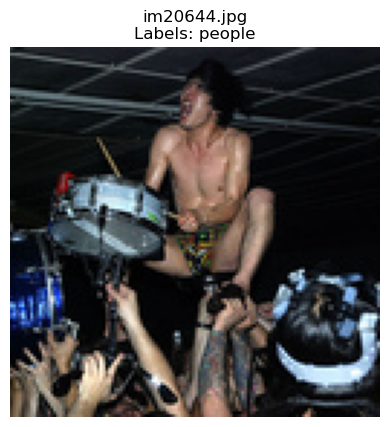

In [61]:
display_random_image(results, "data/competition/images", atleast_n_labels=1)